In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from matplotlib import rc
# rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False

## 만족거리와 시설별 민감도(k) 값 사이의 선형관계 분석

In [4]:
# 데이터프레임의 형태로 만들기

facilities = ['슈퍼 및 편의점', '대형마트', '보육원', 
              '초등학교', '카페', '세탁소', '운동센터', 'ATM기', 
              '버스정류장', '지하철', '병원', '영화관', '도서관', 
              '공원', '경찰서', '소방서']

dict1 = {
    '만족거리' : [629, 1712, 998, 1012, 987, 772, 902, 802, 649, 1058, 946, 1937, 1566, 1273, 1237, 1499],
    'K' : [2.140, 6.903, 4.180, 3.552, 4.040, 3.127, 3.414, 2.918, 2.623, 4.960, 3.614, 7.446, 5.887, 5.252, 4.609, 5.522]
}

k_df = pd.DataFrame(dict1, index=facilities)

k_df

,만족거리,K
슈퍼 및 편의점,629,2.140
대형마트,1712,6.903
보육원,998,4.180
초등학교,1012,3.552
카페,987,4.040
세탁소,772,3.127
운동센터,902,3.414
ATM기,802,2.918
버스정류장,649,2.623
지하철,1058,4.960


### 시각화

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '만족거리')

Text(0, 0.5, 'K')

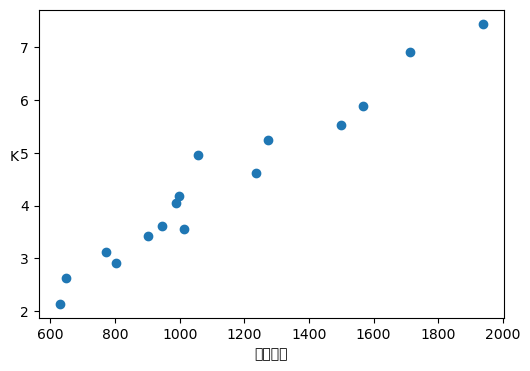

In [5]:
# 산점도 그리기

plt.figure(figsize=(6,4))
plt.scatter(x=k_df['만족거리'], y=k_df['K'])
plt.xlabel('만족거리')
plt.ylabel('K', rotation='horizontal')

plt.show()

Text(0.5, 1.0, '만족거리에 따른 K값의 변화')

Text(0.5, 28.515625, '만족거리')

Text(38.625, 0.5, 'K')

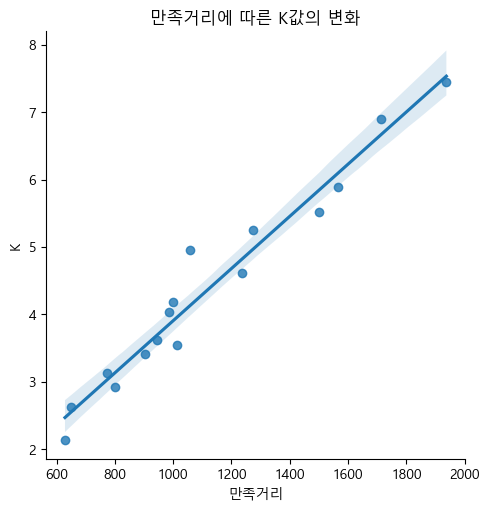

In [6]:
# 한글 깨짐 해결
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 회귀선 그리기
sns.lmplot(x='만족거리', y='K', data=k_df, palette='Set1', height=5)
plt.title("만족거리에 따른 K값의 변화")
plt.xlabel("만족거리")
plt.ylabel("K")
plt.show()

### 모델링

In [7]:
# 회귀분석 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr_clf = LinearRegression()

In [8]:
# train, test 데이터 수동으로 분리

X_train = np.array(k_df['만족거리']).reshape(len(k_df), 1)  # X_train
k_train = np.array(k_df['K']).reshape(len(k_df), 1)  # Y_train

In [9]:
# 학습 및 예측
faci_list = [300, 600, 600, 1000, 1200, 1500, 600]

lr_clf.fit(X_train, k_train)
k_pred = lr_clf.predict(np.array(faci_list).reshape(len(faci_list), 1))

LinearRegression()

In [10]:
# 모델 평가
from sklearn.metrics import r2_score
r2_score(k_train, lr_clf.predict(X_train))
# R제곱 값이 약 0.96으로 성능이 좋음

0.9568840863830695

### 가설 검정

((array([-1.72352605, -1.26569652, -0.97848645, -0.75533862, -0.56472935,
         -0.39279634, -0.23181469, -0.07666006,  0.07666006,  0.23181469,
          0.39279634,  0.56472935,  0.75533862,  0.97848645,  1.26569652,
          1.72352605]),
  array([2.14 , 2.623, 2.918, 3.127, 3.414, 3.552, 3.614, 4.04 , 4.18 ,
         4.609, 4.96 , 5.252, 5.522, 5.887, 6.903, 7.446])),
 (1.5911168750250435, 4.3866875, 0.9843529796088881))

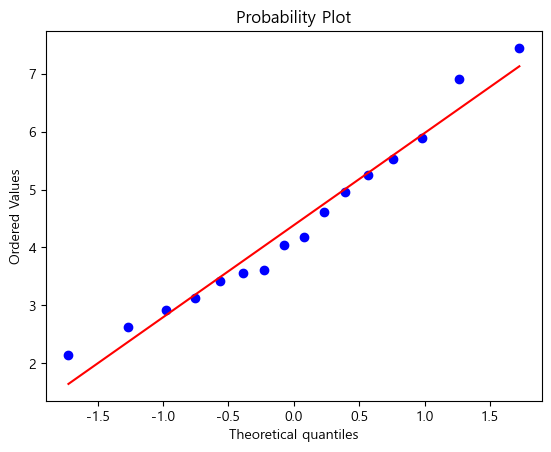

In [11]:
# QQ-plot
import scipy.stats as stats
stats.probplot(k_df['K'], dist=stats.norm, plot=plt)
plt.show()

In [12]:
# 정규성 검정
from scipy.stats import shapiro

shapiro_test = shapiro(k_df['K'])
print('유의수준 0.05에서 p-value는 ', round(shapiro_test.pvalue, 3), '로 정규성을 만족합니다.')

# 결과
# 유의수준 0.05에서 정규성을 만족한다.

유의수준 0.05에서 p-value는  0.691 로 정규성을 만족합니다.


### 예측 K 값 도출

In [13]:
k_df = pd.DataFrame({
    '편의시설' : ["toilet", "conv", "drug", "medi", "safe112", "safe119", "parking", ],
    '만족거리' : faci_list,
    'k' : k_pred.reshape(len(faci_list)),
})

# 편의시설 종류 별 만족거리 및 k
k_df

,편의시설,만족거리,k
0,toilet,300,1.194539
1,conv,600,2.357170
2,drug,600,2.357170
3,medi,1000,3.907345
4,safe112,1200,4.682432
5,safe119,1500,5.845062
6,parking,600,2.357170


In [14]:
k_dict = {}

for faci_name, faci_dist, faci_k in zip(k_df['편의시설'], k_df['만족거리'], k_df['k']):
    k_dict[faci_name] = faci_dist, faci_k
    
k_dict

{'toilet': (300, 1.1945394979383304),
 'conv': (600, 2.357170229397167),
 'drug': (600, 2.357170229397167),
 'medi': (1000, 3.9073445380089495),
 'safe112': (1200, 4.68243169231484),
 'safe119': (1500, 5.845062423773677),
 'parking': (600, 2.357170229397167)}

## 2. 물놀이장 1개와 편의시설 1개 사이의 편의 점수
- notion - 주제 - 점수 도출 방식 2번

In [15]:
dist_df = pd.read_csv('../../data/물놀이/dist.csv', encoding='utf-8')
dist_df

,distwpnumber,distwpname,distfaciid,distfacitype,distfacisubtype,distdist
0,0,서울식물원 물놀이터,KCKIFPO22N000002472,toilet,공중화장실,0
1,0,서울식물원 물놀이터,KCKIFPO22N000002473,toilet,공중화장실,0
2,0,서울식물원 물놀이터,KCKIFPO22N000002474,toilet,공중화장실,0
3,0,서울식물원 물놀이터,KCKIFPO22N000002475,toilet,공중화장실,0
4,0,서울식물원 물놀이터,KCKIFPO22N000002476,toilet,공중화장실,0
...,...,...,...,...,...,...
22301,134,솔길어린이공원 물놀이장,KC490PC22N013244,parking,공영,482
22302,135,동작주차공원,KC490PC22N004183,parking,공영,91
22303,135,동작주차공원,KC490PC22N006174,parking,공영,317
22304,135,동작주차공원,KC490PC22N006175,parking,공영,317


In [16]:
import random
dist_df_index = random.sample(range(0, len(dist_df)), 10)
dist_df.iloc[dist_df_index, :].drop('distfaciid', axis=1)

,distwpnumber,distwpname,distfacitype,distfacisubtype,distdist
21458,73,해누리분수광장 바닥분수,safe112,경찰,971
14306,80,걷고싶은녹화거리,medi,병원,477
16327,96,꿈누리어린이공원(시설 고장으로 페쇄),medi,약국,648
14806,83,장안근린공원 바닥분수,medi,병원,700
1599,57,서해안로 주민쉼터 바닥분수,conv,편의점,325
161,55,인덕마을어린이공원,toilet,공중화장실,225
22120,51,벌말어린이공원 물놀이장,parking,공영,439
3964,4,거리공원 바닥분수,medi,병원,918
4774,10,상상톡톡미술관 물놀이장,medi,병원,959
8224,38,반포 달빛무지개분수,medi,병원,809


In [17]:
dist_df['distfacitype'].value_counts()

medi       17881
conv        2791
toilet       404
safe112      383
safe119      362
parking      317
drug         168
Name: distfacitype, dtype: int64

In [18]:
dist_score_list = []

for i in range(len(dist_df)):
    dist_type = dist_df['distfacitype'][i]
    
    dist_score_list.append(k_dict[dist_type][0] - dist_df['distdist'][i])

In [19]:
dist_df['distscore'] = dist_score_list

In [20]:
dist_df

,distwpnumber,distwpname,distfaciid,distfacitype,distfacisubtype,distdist,distscore
0,0,서울식물원 물놀이터,KCKIFPO22N000002472,toilet,공중화장실,0,300
1,0,서울식물원 물놀이터,KCKIFPO22N000002473,toilet,공중화장실,0,300
2,0,서울식물원 물놀이터,KCKIFPO22N000002474,toilet,공중화장실,0,300
3,0,서울식물원 물놀이터,KCKIFPO22N000002475,toilet,공중화장실,0,300
4,0,서울식물원 물놀이터,KCKIFPO22N000002476,toilet,공중화장실,0,300
...,...,...,...,...,...,...,...
22301,134,솔길어린이공원 물놀이장,KC490PC22N013244,parking,공영,482,118
22302,135,동작주차공원,KC490PC22N004183,parking,공영,91,509
22303,135,동작주차공원,KC490PC22N006174,parking,공영,317,283
22304,135,동작주차공원,KC490PC22N006175,parking,공영,317,283


## 3. 물놀이장 1개의 편의시설 별 편의 점수
- notion - 주제 - 점수 도출 방식 3번

In [21]:
score_df = dist_df.groupby(['distwpnumber', 'distfacitype']).sum('distscore')['distscore'].unstack()
score_df
# 전체 140개가 아닌 138개임

distfacitype,conv,drug,medi,parking,safe112,safe119,toilet
distwpnumber,,,,,,,
0,2002.0,NaN,7275.0,14.0,260.0,NaN,2486.0
1,2787.0,628.0,72440.0,298.0,689.0,552.0,232.0
3,8549.0,810.0,92063.0,127.0,715.0,1518.0,936.0
4,5829.0,185.0,57076.0,567.0,979.0,1057.0,426.0
5,8264.0,1056.0,90664.0,326.0,1545.0,4026.0,1348.0
...,...,...,...,...,...,...,...
135,1404.0,NaN,1181.0,1075.0,NaN,1604.0,1001.0
136,2469.0,284.0,38932.0,29.0,376.0,1598.0,5.0
137,2377.0,288.0,19596.0,NaN,1193.0,1304.0,140.0


In [22]:
# _ = 0
# for _i in score_df.index[2:]:
#     print(_i, _)
#     _ += 1
    
# _ = 3
# for _i in score_df.index[2:]:
#     print(_i, _)
#     _ += 1

# # distwpnumber가 2, 59 인 경우 모두 0점이라 누락됨
# # 모두 0점으로 추가해야 함

In [23]:
score_df = pd.concat([
    score_df.iloc[:2],
    pd.Series([0, ]),
    score_df.iloc[2:58],
    pd.Series([0, ]),
    score_df.iloc[58:],
], ignore_index=True).drop(0, axis=1).fillna(0)

score_df = score_df[['toilet', 'conv', 'drug', 'medi', 'safe112', 'safe119', 'parking']]

score_df

,toilet,conv,drug,medi,safe112,safe119,parking
0,2486.0,2002.0,0.0,7275.0,260.0,0.0,14.0
1,232.0,2787.0,628.0,72440.0,689.0,552.0,298.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,936.0,8549.0,810.0,92063.0,715.0,1518.0,127.0
4,426.0,5829.0,185.0,57076.0,979.0,1057.0,567.0
...,...,...,...,...,...,...,...
135,1001.0,1404.0,0.0,1181.0,0.0,1604.0,1075.0
136,5.0,2469.0,284.0,38932.0,376.0,1598.0,29.0
137,140.0,2377.0,288.0,19596.0,1193.0,1304.0,0.0
138,6.0,1880.0,175.0,12240.0,485.0,1378.0,0.0


## 4. 물놀이장 1개의 편의시설 별 편의 점수 표준화
- notion - 주제 - 점수 도출 방식 4번

In [24]:
norm_score_df = (score_df - score_df.min()) / (score_df.max() - score_df.min())
norm_score_df

,toilet,conv,drug,medi,safe112,safe119,parking
0,1.000000,0.162434,0.000000,0.054174,0.050000,0.000000,0.004313
1,0.093323,0.226126,0.406999,0.539434,0.132500,0.116480,0.091805
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.376508,0.693631,0.524951,0.685559,0.137500,0.320321,0.039125
4,0.171360,0.472941,0.119896,0.425024,0.188269,0.223043,0.174677
...,...,...,...,...,...,...,...
135,0.402655,0.113915,0.000000,0.008794,0.000000,0.338468,0.331177
136,0.002011,0.200325,0.184057,0.289912,0.072308,0.337202,0.008934
137,0.056315,0.192860,0.186649,0.145924,0.229423,0.275164,0.000000
138,0.002414,0.152535,0.113415,0.091147,0.093269,0.290779,0.000000


## 각 편의시설 점수 로그 변환
- 방사형 차트 시각화 용 데이터

In [25]:
norm_score_df_log = np.log1p(norm_score_df*100)
norm_score_df_log = (norm_score_df_log / norm_score_df_log.max())*5
norm_score_df_log

,toilet,conv,drug,medi,safe112,safe119,parking
0,5.000000,3.084892,0.000000,2.014050,1.941184,0.000000,0.388487
1,2.530022,3.425457,4.041606,4.340410,2.878318,2.749117,2.513994
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.959343,4.608405,4.311470,4.595904,2.915680,3.789152,1.724532
4,3.139568,4.200659,2.777990,4.087450,3.236146,3.411219,3.159203
...,...,...,...,...,...,...,...
135,4.030259,2.726916,0.000000,0.683598,0.000000,3.847095,3.824186
136,0.198543,3.300094,3.212881,3.684524,2.283667,3.843152,0.691616
137,2.049607,3.260945,3.227258,2.975853,3.440481,3.629892,0.000000
138,0.234231,3.020843,2.722541,2.506963,2.529462,3.687650,0.000000


<Axes: >

<Axes: xlabel='toilet', ylabel='Density'>

<Axes: >

<Axes: xlabel='conv', ylabel='Density'>

<Axes: >

<Axes: xlabel='drug', ylabel='Density'>

<Axes: >

<Axes: xlabel='medi', ylabel='Density'>

<Axes: >

<Axes: xlabel='safe112', ylabel='Density'>

<Axes: >

<Axes: xlabel='safe119', ylabel='Density'>

<Axes: >

<Axes: xlabel='parking', ylabel='Density'>

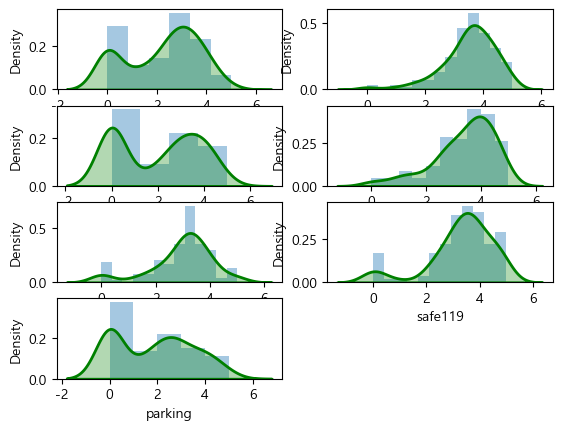

In [26]:
# log 변환 시각화
for i in range(len(norm_score_df_log)):
    plt.subplot(4, 2, i+1)
    sns.distplot(
        norm_score_df_log.iloc[:,i],
        kde_kws={"color" : "g", "alpha" : 0.3, "linewidth" : 2, "shade" : True},
    )
    if i == 6:
        break
plt.show()

In [27]:
norm_score_df_log.describe()

,toilet,conv,drug,medi,safe112,safe119,parking
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2.210460,3.499840,1.992826,3.388201,2.959587,3.302191,1.846867
std,1.466318,0.926893,1.739511,1.112032,1.144868,1.207363,1.608321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.008012,3.107886,0.000000,2.823220,2.542995,2.896637,0.000000
50%,2.657224,3.638188,2.456179,3.679563,3.182766,3.482118,1.933928
75%,3.325069,4.145875,3.557929,4.187017,3.603370,4.011584,3.104177
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## 5. 물놀이장 1개의 편의 점수
- notion - 주제 - 점수 도출 방식 5번

In [28]:
new_norm_score_df = norm_score_df

for faci_name in k_df['편의시설']:
    new_norm_score_df[faci_name] = new_norm_score_df[faci_name] * 1/k_dict[faci_name][1]

In [29]:
norm_score_df['total'] = new_norm_score_df.sum(axis=1)

In [30]:
norm_score_df

,toilet,conv,drug,medi,safe112,safe119,parking,total
0,0.837143,0.068911,0.000000,0.013865,0.010678,0.000000,0.001830,0.932426
1,0.078124,0.095931,0.172664,0.138056,0.028297,0.019928,0.038947,0.571949
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.315191,0.294264,0.222704,0.175454,0.029365,0.054802,0.016598,1.108379
4,0.143452,0.200639,0.050865,0.108776,0.040208,0.038159,0.074104,0.656203
...,...,...,...,...,...,...,...,...
135,0.337080,0.048327,0.000000,0.002251,0.000000,0.057907,0.140498,0.586062
136,0.001684,0.084985,0.078084,0.074197,0.015442,0.057690,0.003790,0.315872
137,0.047144,0.081818,0.079184,0.037346,0.048997,0.047076,0.000000,0.341565
138,0.002020,0.064711,0.048115,0.023327,0.019919,0.049748,0.000000,0.207841


## 6. 물놀이장 1개의 편의 점수 표준화
- notion - 주제 - 점수 도출 방식 6번

In [31]:
norm_score_df['total'] = (norm_score_df['total'] - norm_score_df['total'].min()) / (norm_score_df['total'].max() - norm_score_df['total'].min()) * 100

In [32]:
norm_score_df

,toilet,conv,drug,medi,safe112,safe119,parking,total
0,0.837143,0.068911,0.000000,0.013865,0.010678,0.000000,0.001830,51.828148
1,0.078124,0.095931,0.172664,0.138056,0.028297,0.019928,0.038947,31.791301
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.315191,0.294264,0.222704,0.175454,0.029365,0.054802,0.016598,61.608344
4,0.143452,0.200639,0.050865,0.108776,0.040208,0.038159,0.074104,36.474517
...,...,...,...,...,...,...,...,...
135,0.337080,0.048327,0.000000,0.002251,0.000000,0.057907,0.140498,32.575760
136,0.001684,0.084985,0.078084,0.074197,0.015442,0.057690,0.003790,17.557494
137,0.047144,0.081818,0.079184,0.037346,0.048997,0.047076,0.000000,18.985618
138,0.002020,0.064711,0.048115,0.023327,0.019919,0.049748,0.000000,11.552650


## 각 물놀이장 편의 점수 로그 변환 후 100점으로 정규화

In [33]:
norm_score_df['total'] = np.log1p(norm_score_df['total'])
norm_score_df['total'] = (norm_score_df['total'] / norm_score_df['total'].max()) * 100
norm_score_df

,toilet,conv,drug,medi,safe112,safe119,parking,total
0,0.837143,0.068911,0.000000,0.013865,0.010678,0.000000,0.001830,85.957542
1,0.078124,0.095931,0.172664,0.138056,0.028297,0.019928,0.038947,75.624532
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.315191,0.294264,0.222704,0.175454,0.029365,0.054802,0.016598,89.637931
4,0.143452,0.200639,0.050865,0.108776,0.040208,0.038159,0.074104,78.517151
...,...,...,...,...,...,...,...,...
135,0.337080,0.048327,0.000000,0.002251,0.000000,0.057907,0.140498,76.136785
136,0.001684,0.084985,0.078084,0.074197,0.015442,0.057690,0.003790,63.289218
137,0.047144,0.081818,0.079184,0.037346,0.048997,0.047076,0.000000,64.895660
138,0.002020,0.064711,0.048115,0.023327,0.019919,0.049748,0.000000,54.818325


<Axes: xlabel='total', ylabel='Density'>

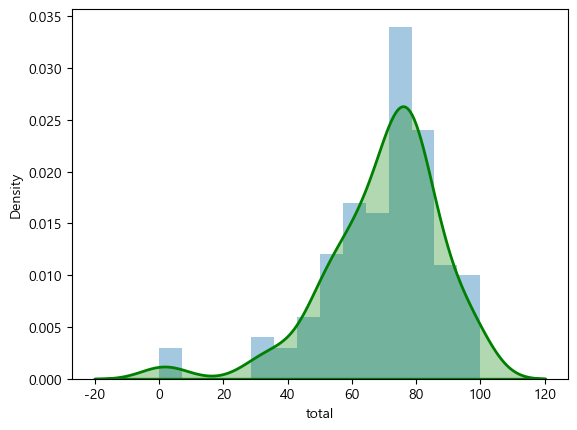

In [34]:
# log 변환 시각화
sns.distplot(
    norm_score_df['total'],
    kde_kws={"color" : "g", "alpha" : 0.3, "linewidth" : 2, "shade" : True},
)
plt.show()

## 로그 변환된 각 편의시설 점수와 병합

In [35]:
norm_score_df_log['total'] = norm_score_df['total']
norm_score_df_log

,toilet,conv,drug,medi,safe112,safe119,parking,total
0,5.000000,3.084892,0.000000,2.014050,1.941184,0.000000,0.388487,85.957542
1,2.530022,3.425457,4.041606,4.340410,2.878318,2.749117,2.513994,75.624532
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3.959343,4.608405,4.311470,4.595904,2.915680,3.789152,1.724532,89.637931
4,3.139568,4.200659,2.777990,4.087450,3.236146,3.411219,3.159203,78.517151
...,...,...,...,...,...,...,...,...
135,4.030259,2.726916,0.000000,0.683598,0.000000,3.847095,3.824186,76.136785
136,0.198543,3.300094,3.212881,3.684524,2.283667,3.843152,0.691616,63.289218
137,2.049607,3.260945,3.227258,2.975853,3.440481,3.629892,0.000000,64.895660
138,0.234231,3.020843,2.722541,2.506963,2.529462,3.687650,0.000000,54.818325


## 물놀이장 1개의 편의 점수 범주화
- notion - 주제 - 점수 도출 방식 7번

In [36]:
total_desc = norm_score_df_log['total'].describe()

In [37]:
total_desc

count    140.000000
mean      69.668450
std       18.094674
min        0.000000
25%       61.494362
50%       73.440187
75%       80.739924
max      100.000000
Name: total, dtype: float64

In [38]:
norm_score_df_log['totaldesc'] = pd.cut(norm_score_df_log['total'], 
                                        bins=[
                                            norm_score_df_log['total'].min()-1,
                                            total_desc['25%'],
                                            total_desc['50%'],
                                            norm_score_df_log['total'].max(),
                                        ], labels=['red', 'yellow', 'blue'])

In [39]:
norm_score_df_log

,toilet,conv,drug,medi,safe112,safe119,parking,total,totaldesc
0,5.000000,3.084892,0.000000,2.014050,1.941184,0.000000,0.388487,85.957542,blue
1,2.530022,3.425457,4.041606,4.340410,2.878318,2.749117,2.513994,75.624532,blue
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,red
3,3.959343,4.608405,4.311470,4.595904,2.915680,3.789152,1.724532,89.637931,blue
4,3.139568,4.200659,2.777990,4.087450,3.236146,3.411219,3.159203,78.517151,blue
...,...,...,...,...,...,...,...,...,...
135,4.030259,2.726916,0.000000,0.683598,0.000000,3.847095,3.824186,76.136785,blue
136,0.198543,3.300094,3.212881,3.684524,2.283667,3.843152,0.691616,63.289218,yellow
137,2.049607,3.260945,3.227258,2.975853,3.440481,3.629892,0.000000,64.895660,yellow
138,0.234231,3.020843,2.722541,2.506963,2.529462,3.687650,0.000000,54.818325,red


## waterplay data와 병합

In [40]:
norm_score_df_log.columns

Index(['toilet', 'conv', 'drug', 'medi', 'safe112', 'safe119', 'parking',
       'total', 'totaldesc'],
      dtype='object')

In [41]:
norm_score_df_log.columns = [
    'waterplayscoretoilet',
    'waterplayscoreconv',
    'waterplayscoredrug',
    'waterplayscoremedi',
    'waterplayscoresafe112',
    'waterplayscoresafe119',
    'waterplayscoreparking',
    'waterplayscorefaci',
    'waterplayscorefacidesc',
]

In [42]:
norm_score_df_log.columns

Index(['waterplayscoretoilet', 'waterplayscoreconv', 'waterplayscoredrug',
       'waterplayscoremedi', 'waterplayscoresafe112', 'waterplayscoresafe119',
       'waterplayscoreparking', 'waterplayscorefaci',
       'waterplayscorefacidesc'],
      dtype='object')

In [43]:
wp = pd.read_csv('../../data/물놀이/WP.csv', encoding='utf-8')
wp = wp[['waterplayname', 'waterplayimgurl', 'waterplayaddrold',
       'waterplayaddrnew', 'waterplaytelno', 'waterplayurl', 'waterplayname01',
       'waterplayvalue01', 'waterplayname02', 'waterplayvalue02',
       'waterplayname03', 'waterplayvalue03', 'waterplayname04',
       'waterplayvalue04', 'waterplayname05', 'waterplayvalue05',
       'waterplayname06', 'waterplayvalue06', 'waterplayname07',
       'waterplayvalue07', 'waterplaytypeid', 'waterplaytype', 'waterplayla',
       'waterplaylo',]]

In [44]:
wp = pd.concat([wp, norm_score_df_log], axis=1)
wp

,waterplayname,waterplayimgurl,waterplayaddrold,waterplayaddrnew,waterplaytelno,waterplayurl,waterplayname01,waterplayvalue01,waterplayname02,waterplayvalue02,...,waterplaylo,waterplayscoretoilet,waterplayscoreconv,waterplayscoredrug,waterplayscoremedi,waterplayscoresafe112,waterplayscoresafe119,waterplayscoreparking,waterplayscorefaci,waterplayscorefacidesc
0,서울식물원 물놀이터,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,강서구 마곡동 812,서울특별시 강서구 마곡동로 161,02-2104-9738,seoul.go.kr,운영기간,2022.7.01.(토)~8.31.(목),운영시간,(매일)11:00~16:40/하루 5회(매회 40분씩)\n휴무일 : 매주 월요일\n...,...,126.832840,5.000000,3.084892,0.000000,2.014050,1.941184,0.000000,0.388487,85.957542,blue
1,사랑어린이공원,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,노원구 상계동 765,서울특별시 노원구 동일로213길 21,02-2116-3975,0,운영기간,2023. 5.8. ~ 8.31.,운영시간,"12:00 ~ 16:40 (40분가동, 20분 휴동)",...,127.060232,2.530022,3.425457,4.041606,4.340410,2.878318,2.749117,2.513994,75.624532,blue
2,난지 물놀이장분수,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,마포구 상암동 482-182,0,0,https://hangang.seoul.go.kr/www/contents/858.d...,이용기간,7~8월,운영시간,매회 20분. 월요일은 가동 정지\n12:00 ~ 18:00 (매 시간 정각 가동),...,126.879399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,red
3,복사꽃어린이공원,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,마포구 도화동 533,서울특별시 마포구 마포대로4길 11-2,02-3153-9576,0,운영기간,2023. 5. 1.(월) ~ 9. 27.(수),운영시간,10:00~18:00 \n -1일 7~8회(회당 40분 가동),...,126.946286,3.959343,4.608405,4.311470,4.595904,2.915680,3.789152,1.724532,89.637931,blue
4,거리공원 바닥분수,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,구로구 구로동 50,서울특별시 구로구 공원로 73-1,02-860-3162,www.guro.go.kr,운영기간,2023.6.5.(월)~8.31.(목),운영시간,"(매일)12:00, 13:00, 16:00, 17:00 / 하루 4회(매회 30분씩)",...,126.888695,3.139568,4.200659,2.777990,4.087450,3.236146,3.411219,3.159203,78.517151,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,동작주차공원,https://map.seoul.go.kr//smgis2/file/ucimgs/co...,동작구 동작동 326,서울특별시 동작구 현충로 220,02-820-9585,0,운영기간,"2023.7.21.(금)~8.6.(일)\n(매주 월요일 휴무, 7. 24. / 7...",운영시간,"10:00 ~ 17:00\n(매시 50분운영, 10분 휴식)",...,126.977940,4.030259,2.726916,0.000000,0.683598,0.000000,3.847095,3.824186,76.136785,blue
136,광나루 수영장,https://map.seoul.go.kr//smgis/ucimgs/conts/10...,강동구 암사동 637-6,서울특별시 강동구 선사로 83-106,02-470-9561,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,127.122199,0.198543,3.300094,3.212881,3.684524,2.283667,3.843152,0.691616,63.289218,yellow
137,뚝섬 수영장,https://map.seoul.go.kr//smgis/ucimgs/conts/10...,광진구 자양동 112,0,02-452-5955,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,127.067734,2.049607,3.260945,3.227258,2.975853,3.440481,3.629892,0.000000,64.895660,yellow
138,여의도 수영장,https://map.seoul.go.kr//smgis/ucimgs/conts/10...,영등포구 여의도동 82-9,0,02-785-0478,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,126.920203,0.234231,3.020843,2.722541,2.506963,2.529462,3.687650,0.000000,54.818325,red


### imgurl 완성

In [45]:
wp['waterplayimgurl'] = "https://map.seoul.go.kr/" + wp['waterplayimgurl']

In [46]:
wp

,waterplayname,waterplayimgurl,waterplayaddrold,waterplayaddrnew,waterplaytelno,waterplayurl,waterplayname01,waterplayvalue01,waterplayname02,waterplayvalue02,...,waterplaylo,waterplayscoretoilet,waterplayscoreconv,waterplayscoredrug,waterplayscoremedi,waterplayscoresafe112,waterplayscoresafe119,waterplayscoreparking,waterplayscorefaci,waterplayscorefacidesc
0,서울식물원 물놀이터,https://map.seoul.go.kr/https://map.seoul.go.k...,강서구 마곡동 812,서울특별시 강서구 마곡동로 161,02-2104-9738,seoul.go.kr,운영기간,2022.7.01.(토)~8.31.(목),운영시간,(매일)11:00~16:40/하루 5회(매회 40분씩)\n휴무일 : 매주 월요일\n...,...,126.832840,5.000000,3.084892,0.000000,2.014050,1.941184,0.000000,0.388487,85.957542,blue
1,사랑어린이공원,https://map.seoul.go.kr/https://map.seoul.go.k...,노원구 상계동 765,서울특별시 노원구 동일로213길 21,02-2116-3975,0,운영기간,2023. 5.8. ~ 8.31.,운영시간,"12:00 ~ 16:40 (40분가동, 20분 휴동)",...,127.060232,2.530022,3.425457,4.041606,4.340410,2.878318,2.749117,2.513994,75.624532,blue
2,난지 물놀이장분수,https://map.seoul.go.kr/https://map.seoul.go.k...,마포구 상암동 482-182,0,0,https://hangang.seoul.go.kr/www/contents/858.d...,이용기간,7~8월,운영시간,매회 20분. 월요일은 가동 정지\n12:00 ~ 18:00 (매 시간 정각 가동),...,126.879399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,red
3,복사꽃어린이공원,https://map.seoul.go.kr/https://map.seoul.go.k...,마포구 도화동 533,서울특별시 마포구 마포대로4길 11-2,02-3153-9576,0,운영기간,2023. 5. 1.(월) ~ 9. 27.(수),운영시간,10:00~18:00 \n -1일 7~8회(회당 40분 가동),...,126.946286,3.959343,4.608405,4.311470,4.595904,2.915680,3.789152,1.724532,89.637931,blue
4,거리공원 바닥분수,https://map.seoul.go.kr/https://map.seoul.go.k...,구로구 구로동 50,서울특별시 구로구 공원로 73-1,02-860-3162,www.guro.go.kr,운영기간,2023.6.5.(월)~8.31.(목),운영시간,"(매일)12:00, 13:00, 16:00, 17:00 / 하루 4회(매회 30분씩)",...,126.888695,3.139568,4.200659,2.777990,4.087450,3.236146,3.411219,3.159203,78.517151,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,동작주차공원,https://map.seoul.go.kr/https://map.seoul.go.k...,동작구 동작동 326,서울특별시 동작구 현충로 220,02-820-9585,0,운영기간,"2023.7.21.(금)~8.6.(일)\n(매주 월요일 휴무, 7. 24. / 7...",운영시간,"10:00 ~ 17:00\n(매시 50분운영, 10분 휴식)",...,126.977940,4.030259,2.726916,0.000000,0.683598,0.000000,3.847095,3.824186,76.136785,blue
136,광나루 수영장,https://map.seoul.go.kr/https://map.seoul.go.k...,강동구 암사동 637-6,서울특별시 강동구 선사로 83-106,02-470-9561,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,127.122199,0.198543,3.300094,3.212881,3.684524,2.283667,3.843152,0.691616,63.289218,yellow
137,뚝섬 수영장,https://map.seoul.go.kr/https://map.seoul.go.k...,광진구 자양동 112,0,02-452-5955,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,127.067734,2.049607,3.260945,3.227258,2.975853,3.440481,3.629892,0.000000,64.895660,yellow
138,여의도 수영장,https://map.seoul.go.kr/https://map.seoul.go.k...,영등포구 여의도동 82-9,0,02-785-0478,https://hangang.seoul.go.kr/archives/46886,이용시간,가. 허용기간 : 2023.6.23.(금)~8.20.(일)\n나. 허용시간 : 09...,이용안내,"어린이(만6세~만12세) 3,000원\n청소년(만13~만18세) 4,000원\n성인...",...,126.920203,0.234231,3.020843,2.722541,2.506963,2.529462,3.687650,0.000000,54.818325,red


In [47]:
# wp.to_csv('../../data/물놀이/WP.csv', index=False, encoding='utf-8')
# wp.to_csv('../../data/물놀이/WP_euc.csv', index=False, encoding='euc-kr')